In [16]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#making a dataframe using the csv file
df = pd.read_csv('Iris.csv')

In [29]:
y = df['Species']
x= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [19]:
#since we need to classify only iris versicolor and virginica, we drop iris setosa rows.
x.drop(y.index[(y == 'Iris-setosa')], axis=0,inplace=True)

C:\Users\realv\AppData\Local\Temp\ipykernel_29904\3900732847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(y.index[(y == 'Iris-setosa')], axis=0,inplace=True)


In [20]:
y.drop(y.index[(y == 'Iris-setosa')], axis=0,inplace=True)


In [21]:
y

50     Iris-versicolor
51     Iris-versicolor
52     Iris-versicolor
53     Iris-versicolor
54     Iris-versicolor
            ...       
145     Iris-virginica
146     Iris-virginica
147     Iris-virginica
148     Iris-virginica
149     Iris-virginica
Name: Species, Length: 100, dtype: object

In [22]:
#to all the entries of iris versicolor we index them as 0 and virginica to 1, this will help us classifying
index_0=y.index[(y== 'Iris-versicolor')]
index_1=y.index[(y == 'Iris-virginica')]
y[index_0]=0
y[index_1]=1

In [23]:
#defining a sigmoid function
def sigmoid(y):
    y_=(1 + np.exp(-y))
    return 1/y_

In [24]:
y = y.to_numpy()

In [25]:
#converting dataframe to numpy array
x1=x['SepalLengthCm'].to_numpy()
x2=x['SepalWidthCm'].to_numpy()
x3=x['PetalLengthCm'].to_numpy()
x4=x['PetalWidthCm'].to_numpy()



In [26]:
y.shape

(100,)

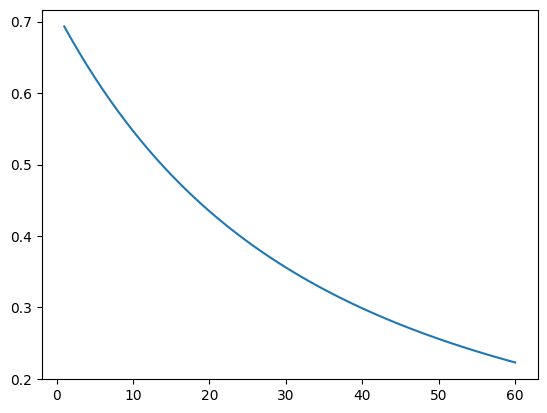

In [27]:
iter = 60           #no. of iterations
l=0.001             #learning rate
Loss=[]
Accuracy=[]
w1,w2,w3,w4,b=0,0,0,0,0            #weights and bias

#applying logistic regression
for i in range(iter):
    Correct=0                       #counts the true positives andd true negative predictions
    yp = w1*x1 + w2*x2 + w3*x3 + w4*x4 + b         
    yp=yp.astype(np.double)
    ypp=sigmoid(yp)
    predicted_y=np.ones((100,))
    for i in range(100):
        if ypp[i]>=0.75:
            predicted_y[i]=1
        else:
            predicted_y[i]=0
        if y[i]==predicted_y[i]:
            Correct = Correct+1
    Accuracy.append(Correct)

    #finding the binary cross entropy loss   
    loss = -(np.sum(y*np.log(ypp) + (1-y)*np.log(1-ypp)))/100
    Loss.append(loss)
    grad_w1 = (ypp-y)*x1
    grad_w2 = (ypp-y)*x2
    grad_w3 =  (ypp-y)*x3
    grad_w4 = (ypp-y)*x4
    grad_b = (ypp-y)

    w1,w2,w3,w4,b = w1-l*grad_w1,w2-l*grad_w2,w3-l*grad_w3,w4-l*grad_w4,b-l*grad_b      #updating weights and biases




plt.plot(range(1,iter+1),Loss)



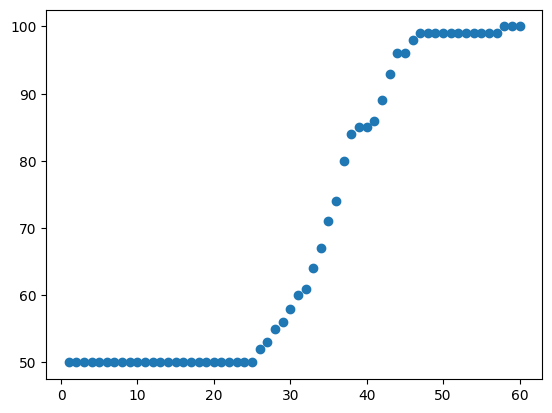

In [28]:

plt.scatter(range(1,iter+1),Accuracy)